In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd
from scipy.stats import ttest_ind
from numba import njit, jit
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
meta = pd.read_csv('../data/META_SL.csv')

In [3]:
meta['plat'].unique()

array(['Agilent', 'Illumina_NGS', 'Affymetrix_U133', 'Illumina_Chip',
       'Affymetrix_HUG', 'Affymetrix_PRV'], dtype=object)

In [4]:
meta

,CN,type,plat,TP
0,C_1,Solid tumor,Agilent,Solid tumor_Agilent
1,C_2,Solid tumor,Agilent,Solid tumor_Agilent
2,C_3,Solid tumor,Agilent,Solid tumor_Agilent
3,C_4,Solid tumor,Agilent,Solid tumor_Agilent
4,C_5,Solid tumor,Agilent,Solid tumor_Agilent
...,...,...,...,...
7162,C_7163,C,Affymetrix_PRV,C_Affymetrix_PRV
7163,C_7164,D,Affymetrix_PRV,D_Affymetrix_PRV
7164,C_7165,D,Affymetrix_PRV,D_Affymetrix_PRV
7165,C_7166,D,Affymetrix_PRV,D_Affymetrix_PRV


#### Данные, на которых нужно проверить гипотезу

In [5]:
data = pd.read_csv('D:/data/01.csv')

In [6]:
data.head()

,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_7158,C_7159,C_7160,C_7161,C_7162,C_7163,C_7164,C_7165,C_7166,C_7167
A2M,310.026372,232.403212,307.856452,847.642604,945.230210,345.474346,408.721530,403.978519,433.441708,174.045851,...,242.708926,236.817932,337.206321,337.948817,341.951452,353.027278,384.281077,336.270068,253.596827,328.649138
AACS,62.259356,54.372517,58.997254,63.058126,63.840055,54.340430,51.717657,55.401959,63.667759,63.272263,...,19.871556,19.181594,16.877606,15.626817,15.550764,17.011678,17.042162,20.948055,20.310675,20.257974
AAK1,20.319500,20.472538,15.605837,14.581376,14.581175,13.284006,13.788083,16.145440,14.363882,23.722928,...,187.299252,178.296464,83.339575,75.770559,73.637038,77.602058,136.658481,139.982613,146.110188,154.315961
AAMP,84.273350,72.945710,75.018213,85.454319,115.877103,72.117288,73.255693,71.721165,93.600319,133.540965,...,45.375495,44.891344,60.600925,61.613104,58.601870,63.450238,42.078017,43.602275,43.787771,44.847949
AANAT,19.995217,15.886637,11.977289,13.013180,15.318985,7.920382,8.030664,14.482298,12.211534,25.287061,...,7.215003,6.816042,3.845561,4.173824,3.613578,4.122738,6.485440,6.223228,6.651046,5.930587


In [7]:
data.columns = meta['CN']

In [8]:
data.head()

CN,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_7158,C_7159,C_7160,C_7161,C_7162,C_7163,C_7164,C_7165,C_7166,C_7167
A2M,310.026372,232.403212,307.856452,847.642604,945.230210,345.474346,408.721530,403.978519,433.441708,174.045851,...,242.708926,236.817932,337.206321,337.948817,341.951452,353.027278,384.281077,336.270068,253.596827,328.649138
AACS,62.259356,54.372517,58.997254,63.058126,63.840055,54.340430,51.717657,55.401959,63.667759,63.272263,...,19.871556,19.181594,16.877606,15.626817,15.550764,17.011678,17.042162,20.948055,20.310675,20.257974
AAK1,20.319500,20.472538,15.605837,14.581376,14.581175,13.284006,13.788083,16.145440,14.363882,23.722928,...,187.299252,178.296464,83.339575,75.770559,73.637038,77.602058,136.658481,139.982613,146.110188,154.315961
AAMP,84.273350,72.945710,75.018213,85.454319,115.877103,72.117288,73.255693,71.721165,93.600319,133.540965,...,45.375495,44.891344,60.600925,61.613104,58.601870,63.450238,42.078017,43.602275,43.787771,44.847949
AANAT,19.995217,15.886637,11.977289,13.013180,15.318985,7.920382,8.030664,14.482298,12.211534,25.287061,...,7.215003,6.816042,3.845561,4.173824,3.613578,4.122738,6.485440,6.223228,6.651046,5.930587


In [9]:
data = data.astype(float)

In [10]:
data.head()

CN,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_7158,C_7159,C_7160,C_7161,C_7162,C_7163,C_7164,C_7165,C_7166,C_7167
A2M,310.026372,232.403212,307.856452,847.642604,945.230210,345.474346,408.721530,403.978519,433.441708,174.045851,...,242.708926,236.817932,337.206321,337.948817,341.951452,353.027278,384.281077,336.270068,253.596827,328.649138
AACS,62.259356,54.372517,58.997254,63.058126,63.840055,54.340430,51.717657,55.401959,63.667759,63.272263,...,19.871556,19.181594,16.877606,15.626817,15.550764,17.011678,17.042162,20.948055,20.310675,20.257974
AAK1,20.319500,20.472538,15.605837,14.581376,14.581175,13.284006,13.788083,16.145440,14.363882,23.722928,...,187.299252,178.296464,83.339575,75.770559,73.637038,77.602058,136.658481,139.982613,146.110188,154.315961
AAMP,84.273350,72.945710,75.018213,85.454319,115.877103,72.117288,73.255693,71.721165,93.600319,133.540965,...,45.375495,44.891344,60.600925,61.613104,58.601870,63.450238,42.078017,43.602275,43.787771,44.847949
AANAT,19.995217,15.886637,11.977289,13.013180,15.318985,7.920382,8.030664,14.482298,12.211534,25.287061,...,7.215003,6.816042,3.845561,4.173824,3.613578,4.122738,6.485440,6.223228,6.651046,5.930587


#### Код Стьюдента

In [11]:
rng = np.random.default_rng()

In [12]:
def get_splitted_columns(columns):
    shuffled = rng.permutation(columns)
    columns_1 = shuffled[:len(columns) // 2]
    columns_2 = shuffled[len(columns) // 2:]
    return columns_1, columns_2

In [13]:
def split_for_f(gene, columns_1, columns_2):
    sample_1 = gene[columns_1].values
    sample_2 = gene[columns_2].values
    return f(sample_1, sample_2)

$$
f_g = sign(\overline{D}_g - \overline{H}_g) \cdot (-lg(P_g))
$$

In [14]:
# @njit
def f(sample_1, sample_2):
    sign = np.sign(sample_1.mean() - sample_2.mean())
    p_value = ttest_ind(sample_1, sample_2)[1]
    return sign * (-np.log1p(p_value))

In [15]:
def calc_corr(data, fixed_cols, splitting_cols):
    cols_1, cols_2 = get_splitted_columns(splitting_cols)
    
    f_1 = data.apply(split_for_f, args=(fixed_cols, cols_1), axis=1)
    f_2 = data.apply(split_for_f, args=(fixed_cols, cols_2), axis=1)
    
    return f_1.corr(f_2)

In [16]:
# %time calc_corr(data, plat_1, plat_2)

#### Перебор всех пар платформ

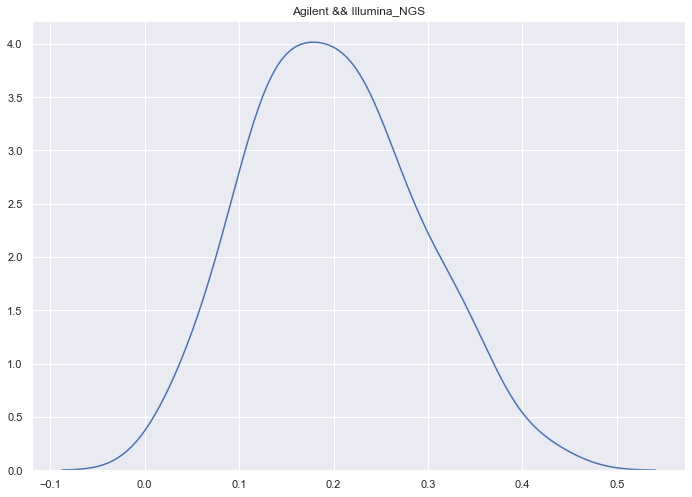

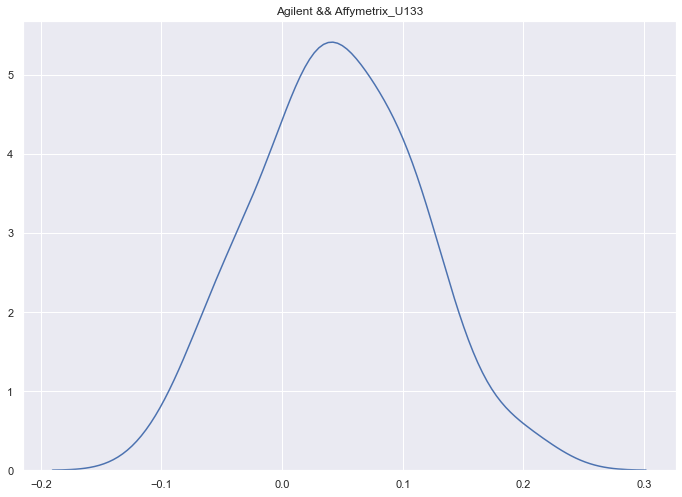

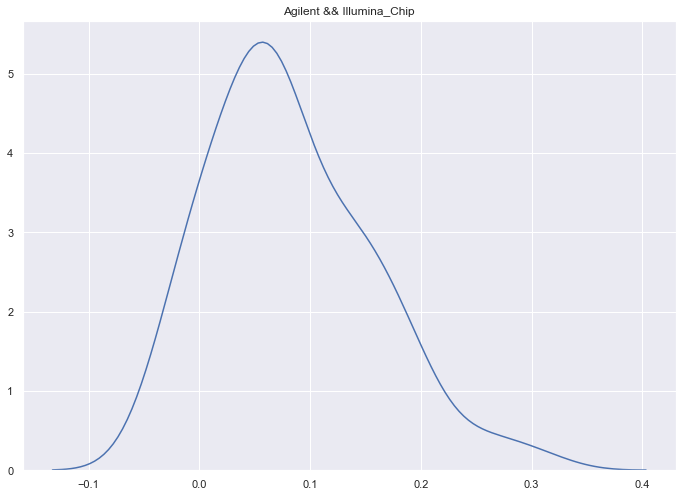

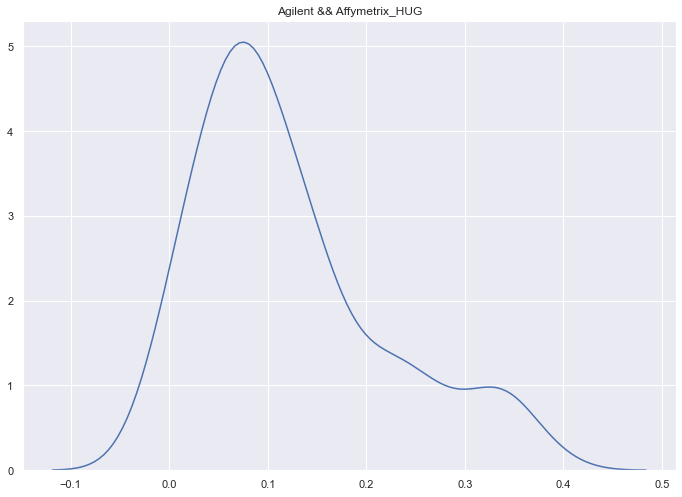

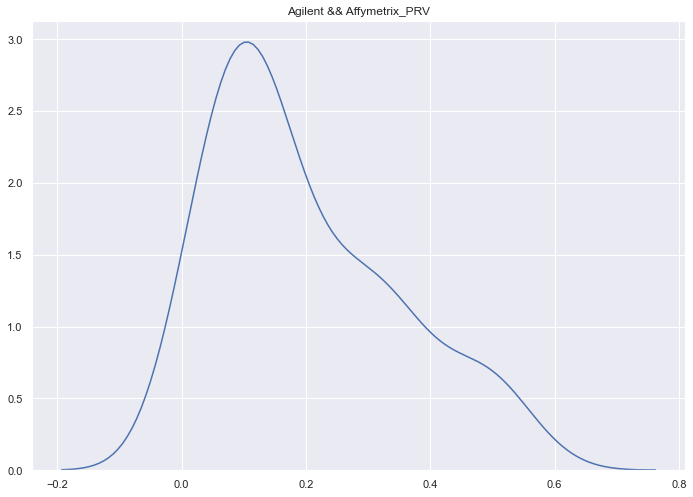

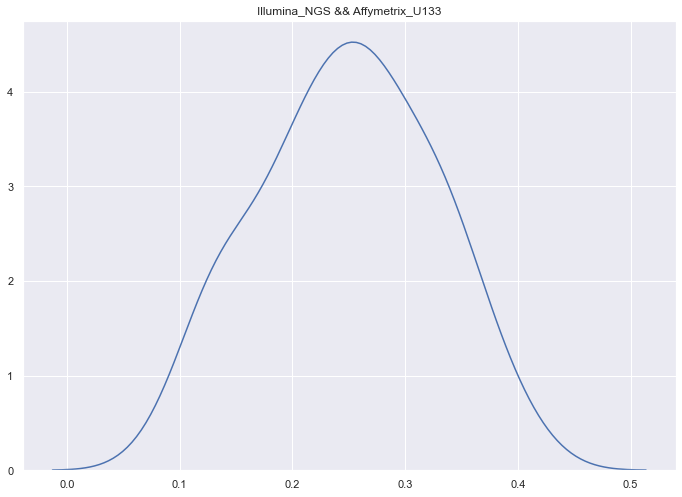

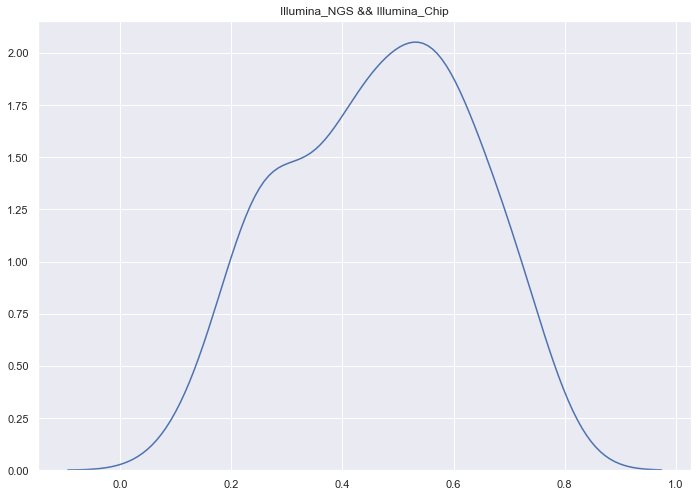

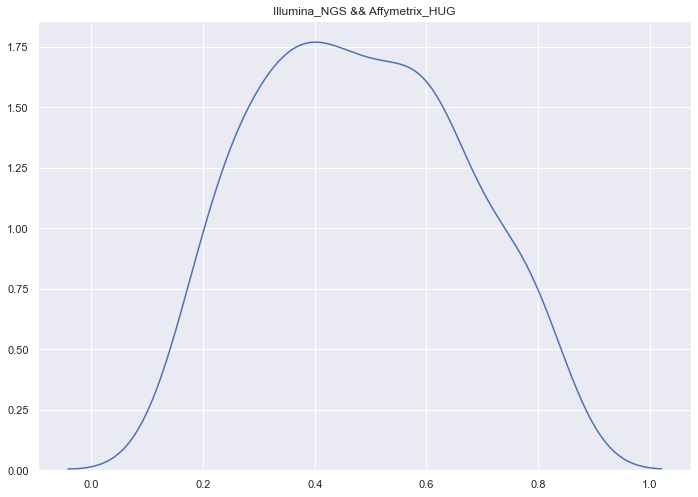

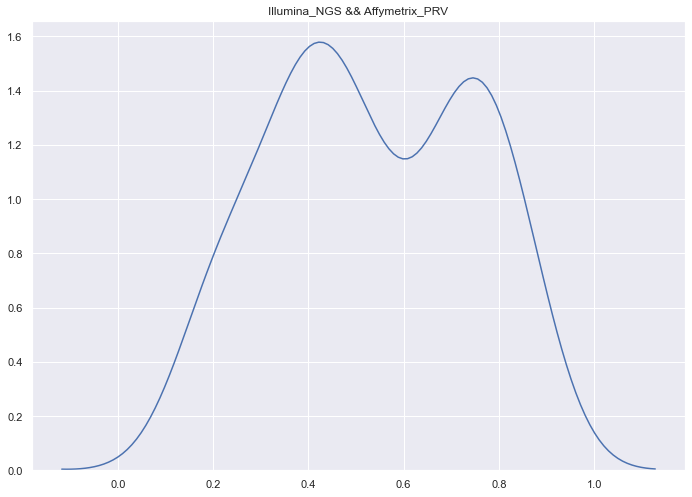

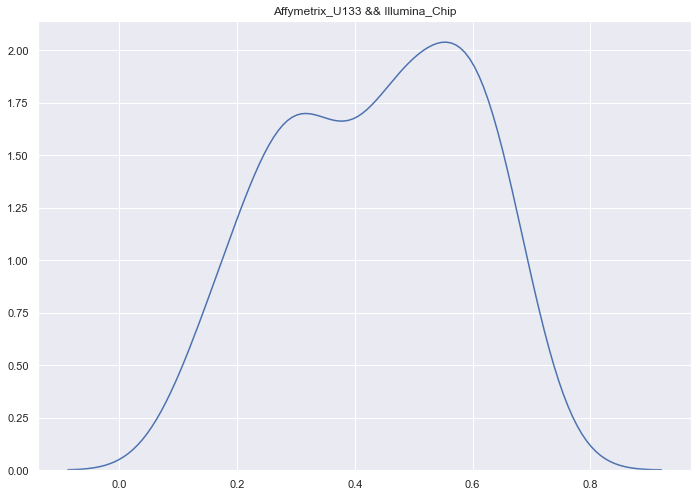

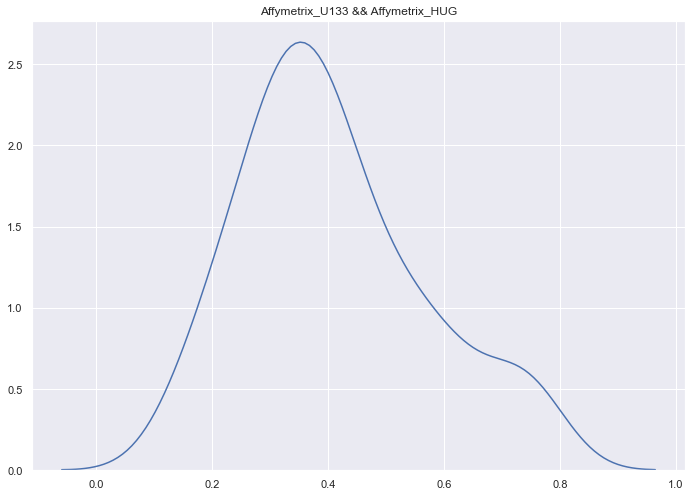

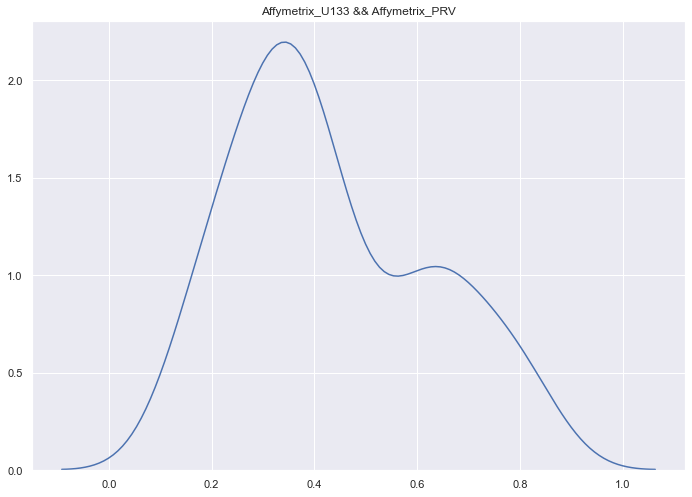

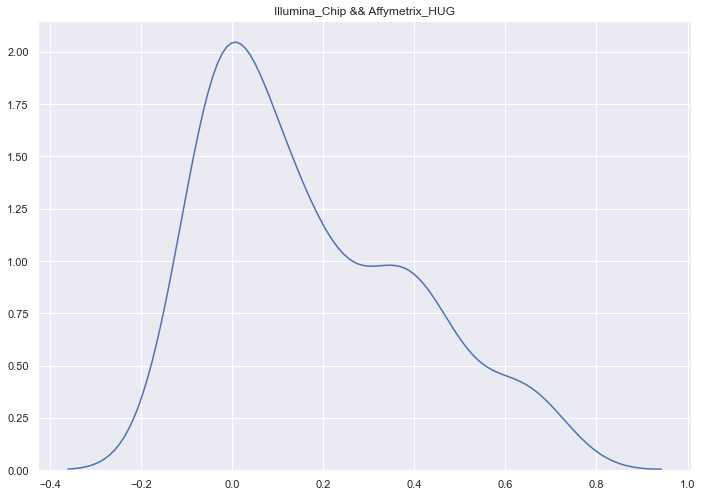

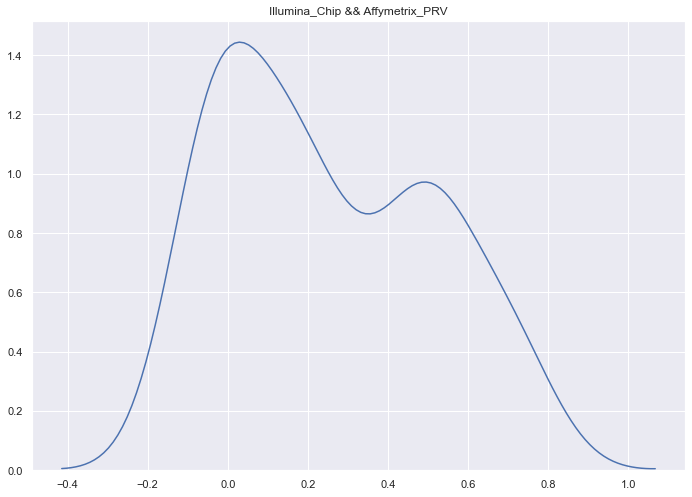

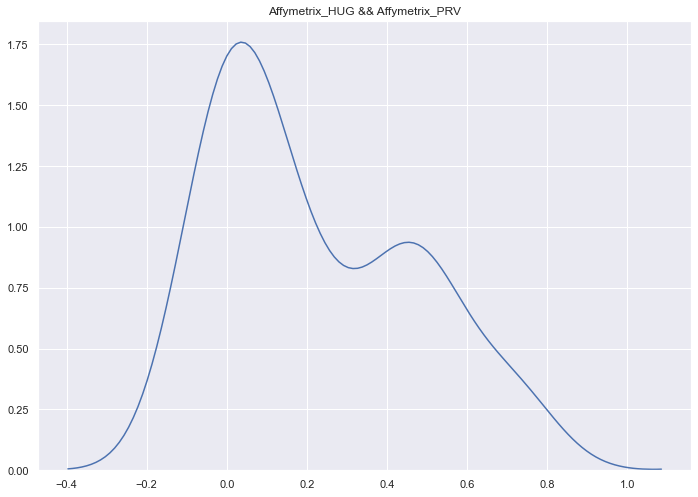

In [17]:
for idx_1, title_1 in enumerate(meta['plat'].unique()):
    for idx_2, title_2 in enumerate(meta['plat'].unique()):
        
        if(idx_2 > idx_1):
            
            plat_1 = meta[meta['plat'] == title_1]['CN']
            plat_2 = meta[meta['plat'] ==  title_2]['CN']
            
            corrs = [calc_corr(data, plat_1, plat_2) for i in range(100)]
            
            plt.figure()
            plt.title(title_1 + " && " + title_2)
            sns.distplot(corrs, hist=False)